In [1]:
%reset -f
import pandas as pd
import numpy as np
import seaborn as sns
import pickle, os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['mathtext.fontset'] = 'cm'

2023-12-01 14:44:40.669677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-01 14:44:40.669734: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
path = r'/home/d/dlr10/Documents/02_Statitics_modelling'
#pickles_files = [x for x in os.listdir(path+ r'/3_Modelling_V3/Static_Data_First_Day/Data_Balanced') if '.pickle' in x]

In [3]:
columns = ['DataType', 'CollectionTime', 'Skewness', 'FeatureEngineering', 'Classifier', 
           'CurbStrat', 'AgeStrat', 'AUC', 'Recall', 'Precision', 'Accuracy', 'Brier', 'F1_score']
df_results = pd.DataFrame(columns = columns)

In [4]:
new_path = r'/home/d/dlr10/Documents/02_Statitics_modelling/3_Modelling_V4/Sub_results'
pickles   = [x for x in os.listdir(new_path) if '.pickle' in x]
pick = 'results_1st_Bal_GRU_.pickle'
pickle_path = new_path + r'/' + pick
results, dict_auroc = pickle.load(open(pickle_path,'rb'))
results

,Precision,Recall,F1_Score,Accuracy,AUC,brier,AUC_IC
name,,,,,,,
1st_Bal_GRU_XGB_NoSt,0.389974,0.616255,0.477671,0.668018,0.709857,0.204147,"[0.7, 0.721]"
1st_Bal_GRU_XGB_>65,0.414851,0.569597,0.480062,0.622877,0.655799,0.222935,"[0.64, 0.67]"
1st_Bal_GRU_XGB_<65,0.225410,0.539216,0.317919,0.720490,0.689745,0.182855,"[0.66, 0.714]"
1st_Bal_GRU_RFT_NoSt,0.381563,0.643004,0.478927,0.655347,0.711782,0.203888,"[0.7, 0.723]"
1st_Bal_GRU_RFT_>65,0.436926,0.551893,0.487726,0.645643,0.659729,0.220961,"[0.65, 0.674]"
1st_Bal_GRU_RFT_<65,0.231544,0.450980,0.305987,0.752862,0.688012,0.169768,"[0.66, 0.714]"
1st_Bal_GRU_STA_NoSt,0.381915,0.593107,0.464638,0.663330,0.704044,0.201767,"[0.69, 0.715]"
1st_Bal_GRU_STA_>65,0.425917,0.517705,0.467346,0.639298,0.648941,0.223003,"[0.64, 0.663]"
1st_Bal_GRU_STA_<65,0.251265,0.486928,0.331479,0.762732,0.703364,0.163195,"[0.67, 0.728]"


In [5]:
new_path = r'/home/d/dlr10/Documents/02_Statitics_modelling/3_Modelling_V4/Sub_results'
pickles   = [x for x in os.listdir(new_path) if '.pickle' in x]
for pick in pickles:
    pickle_path = new_path + r'/' + pick
    results, dict_auroc = pickle.load(open(pickle_path,'rb'))
    
    Model_type = 'Static'
    Mod_coltim = pick.split('_')[1] if pick.split('_')[1] != 'PnT' else 'Pnt'
    Mod_skwnss = pick.split('_')[2] if pick.split('_')[2] == 'Bal' else 'Unbal'
    Mod_clssfr = pick.split('_')[3]
    Mod_crb_st = np.nan
    for indx in results.index:
        if '65' not in indx:
            Mod_FeatEn = indx.split('_')[-2]
            Mod_agestr = np.nan

        else:
            Mod_agestr = indx.split('_')[-1]
            Mod_FeatEn = indx.split('_')[-2]
        Mod_auroc = results.loc[indx, 'AUC']
        Mod_recll = results.loc[indx, 'Recall']

        Mod_precs = results.loc[indx, 'Precision']
        Mod_accrc = results.loc[indx, 'Accuracy']
        Mod_Brier = results.loc[indx, 'brier']
        Mod_F1Sco = results.loc[indx, 'F1_Score']
        model = [Model_type, Mod_coltim, Mod_skwnss, Mod_FeatEn,Mod_clssfr, Mod_crb_st, Mod_agestr, Mod_auroc, Mod_recll,
                        Mod_precs, Mod_accrc, Mod_Brier, Mod_F1Sco]
        df_results = pd.concat([df_results, pd.DataFrame([model], columns = columns )])
df_results

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,Static,1st,Bal,XGB,GRU,NaN,NaN,0.709857,0.616255,0.389974,0.668018,0.204147,0.477671
0,Static,1st,Bal,XGB,GRU,NaN,>65,0.655799,0.569597,0.414851,0.622877,0.222935,0.480062
0,Static,1st,Bal,XGB,GRU,NaN,<65,0.689745,0.539216,0.22541,0.72049,0.182855,0.317919
0,Static,1st,Bal,RFT,GRU,NaN,NaN,0.711782,0.643004,0.381563,0.655347,0.203888,0.478927
0,Static,1st,Bal,RFT,GRU,NaN,>65,0.659729,0.551893,0.436926,0.645643,0.220961,0.487726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Static,1st,Unbal,STA,NN,NaN,>65,0.653658,0.128205,0.623145,0.709834,0.202726,0.212658
0,Static,1st,Unbal,STA,NN,NaN,<65,0.695748,0.071895,0.55,0.880774,0.10227,0.127168
0,Static,1st,Unbal,NoF,NN,NaN,NaN,0.708928,0.182613,0.553822,0.762418,0.169382,0.274662
0,Static,1st,Unbal,NoF,NN,NaN,>65,0.651894,0.169719,0.57438,0.707781,0.202427,0.262017


In [6]:
#################################
#================================
# DATOS DE TS PARA EXPOCISION 
#================================
#################################
file_path = r'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS/ts_mortality_results.pickle'

ts_results = pickle.load(open(file_path,'rb'))
ts_res = []
for idx, row in ts_results.iterrows():
    name_data = row['name'].split('_')
    result = ['TS','3d',name_data[0], np.nan,name_data[1],np.nan, np.nan, row['AUC'], row['Recall'],
             row['Precision'], row['Accuracy'], row['brier'], row['F1_Score']]
    ts_res.append(result)
    
df_results = pd.concat([df_results, pd.DataFrame(ts_res, columns = columns )])

len(df_results)

340

In [7]:
# =========================================================
# STATIC VARIABLES WITH CURB STRATIFICATION FOLDER 3_Modelling_V3_CURB_tiers
# ===========================================================
folder   = r'/3_Modelling_V3_CURB_tiers'
new_path = path + folder
pickles  = [x for x in os.listdir(new_path) if '.pickle' in x]
for pick in pickles:
    pickle_path = new_path + r'/' + pick
    results = pickle.load(open(pickle_path,'rb'))
    for idx, results_crb in enumerate(results[0]):
        df = results_crb[1] 
        Model_type = 'Static'
        
        if 'pnt' in pick: 
            Mod_coltim = 'Pnt'
            Mod_clssfr = pick.replace('pnt_dict_fpr_trp_',"").replace(' Classifier.pickle',"")
        else:
            Mod_coltim = '1st'
            if 'Bal' in pick:
                Mod_skwnss = 'Bal'
                Mod_clssfr = pick.replace('dict_fpr_trp_Bal_',"").replace(' Classifier.pickle',"")
            else:
                Mod_skwnss = 'Unbal'
                Mod_clssfr = pick.replace('dict_fpr_trp_',"").replace(' Classifier.pickle',"")
            
        Mod_crb_st = '0 - 1' if idx ==1 else '   2  ' if idx==2 else '3 - 5'
        Mod_FeatEn = np.nan
        Mod_agestr = np.nan
        Mod_auroc  = df.loc['NoF', 'AUC']
        Mod_recll  = df.loc['NoF', 'Recall']
        
        Mod_precs = df.loc['NoF', 'Precision']
        Mod_accrc = df.loc['NoF', 'Accuracy']
        Mod_Brier = df.loc['NoF', 'brier']
        Mod_F1Sco = df.loc['NoF', 'F1_Score']

        model = [Model_type, Mod_coltim, Mod_skwnss, Mod_FeatEn,Mod_clssfr, Mod_crb_st, Mod_agestr, Mod_auroc, Mod_recll,
                Mod_precs, Mod_accrc, Mod_Brier, Mod_F1Sco]
        
        #model      = [Model_type, Mod_coltim, Mod_skwnss, Mod_FeatEn,Mod_clssfr, Mod_crb_st, Mod_agestr, 
        #              Mod_auroc, Mod_recll]
        df_results = pd.concat([df_results, pd.DataFrame([model], columns = columns )])
len(df_results)

394

In [8]:
df_results[(df_results['CollectionTime'] == '3d') ]

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,TS,3d,Unbal,NaN,GRU,NaN,NaN,0.754584,0.118313,0.734824,0.772301,0.168608,0.20381
1,TS,3d,Bal,NaN,GRU,NaN,NaN,0.764705,0.683128,0.429218,0.698175,0.182621,0.527193
2,TS,3d,Unbal,NaN,LSTM,NaN,NaN,0.754325,0.152778,0.66443,0.772301,0.164022,0.248432
3,TS,3d,Bal,NaN,LSTM,NaN,NaN,0.741048,0.906893,0.309733,0.479219,0.283645,0.46176


In [9]:
print(len(df_results))
df_results[(df_results['CurbStrat'].isna()) & (df_results['CollectionTime'] !='3d')]
len(df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna())])

394


116

In [10]:
len(df_results[~(df_results['CurbStrat'].isna()) | ~(df_results['AgeStrat'].isna())])

278

In [11]:
df_results.iloc[0]['CurbStrat'] 

nan

In [12]:
df_results.to_csv('Results_statics.csv')

In [13]:
df_results[(df_results['AgeStrat'] == '>65') & (df_results['Classifier'] == 'XGB')]

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,Static,Pnt,Unbal,XGB,XGB,NaN,>65,0.677772,0.210623,0.579832,0.712073,0.200482,0.309001
0,Static,Pnt,Unbal,RFT,XGB,NaN,>65,0.67025,0.198413,0.558419,0.707035,0.203,0.292793
0,Static,Pnt,Unbal,STA,XGB,NaN,>65,0.649814,0.141026,0.626016,0.7117,0.206021,0.230194
0,Static,Pnt,Unbal,NoF,XGB,NaN,>65,0.682107,0.195971,0.579422,0.710767,0.200259,0.292883
0,Static,1st,Unbal,XGB,XGB,NaN,>65,0.659982,0.163004,0.558577,0.704796,0.204687,0.252363
0,Static,1st,Unbal,RFT,XGB,NaN,>65,0.653935,0.154457,0.564732,0.705169,0.206035,0.24257
0,Static,1st,Unbal,STA,XGB,NaN,>65,0.651148,0.160562,0.535642,0.700877,0.207532,0.247064
0,Static,1st,Unbal,NoF,XGB,NaN,>65,0.662015,0.161172,0.571429,0.706662,0.20596,0.251429
0,Static,1st,Bal,XGB,XGB,NaN,>65,0.653695,0.564713,0.414241,0.622877,0.230879,0.477913
0,Static,1st,Bal,RFT,XGB,NaN,>65,0.646337,0.564103,0.410849,0.619519,0.232945,0.475431


# Present results

# 1. Skewness

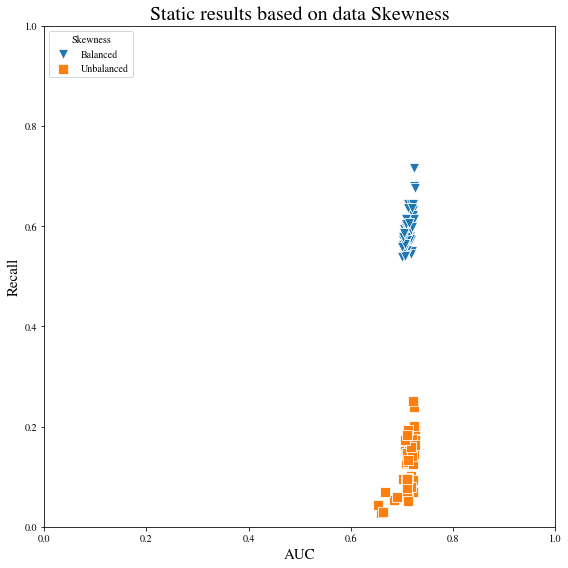

In [14]:
#############################################################################
# SKEWNESS
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & 
                      (df_results['DataType'] != 'TS')].copy()
df_bal   = df[df['Skewness'] == 'Bal']
df_unbal = df[df['Skewness'] == 'Unbal']


a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_bal,   x="AUC", y="Recall", marker = "v", s=100)
sns.scatterplot(data = df_unbal, x="AUC", y="Recall", marker = "s", s=100)

plt.legend(title='Skewness', loc='upper left', labels=['Balanced', 'Unbalanced'])
plt.title('Static results based on data Skewness', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_Skewness_full.png', transparent = True, bbox_inches = "tight")
plt.show()

# 2. Data Type

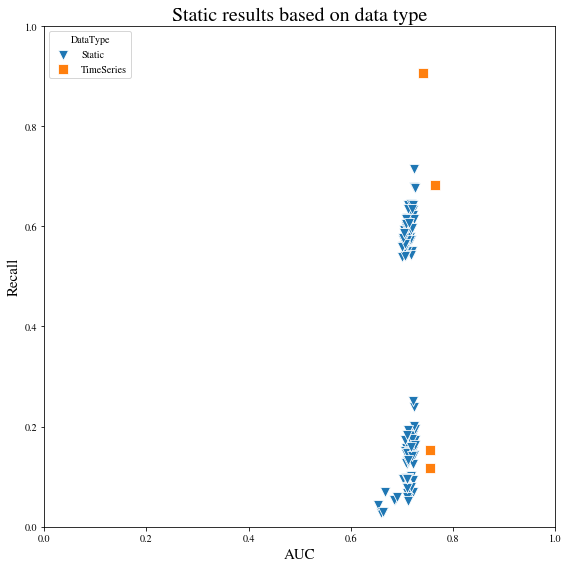

In [15]:
#############################################################################
# DATATYPE
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna())].copy()
df_bal   = df[df['DataType'] == 'Static']
df_unbal = df[df['DataType'] == 'TS']


a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_bal,   x="AUC", y="Recall",  marker = "v", s=100)
sns.scatterplot(data = df_unbal, x="AUC", y="Recall",  marker = "s", s=100)
plt.legend(title='DataType', loc='upper left', labels=['Static', 'TimeSeries'])
plt.title('Static results based on data type', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
#plt.savefig('Static_DataType.png', transparent = True, bbox_inches = "tight")
plt.show()

# 3. Collection Time 

In [16]:
df_results

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,Static,1st,Bal,XGB,GRU,NaN,NaN,0.709857,0.616255,0.389974,0.668018,0.204147,0.477671
0,Static,1st,Bal,XGB,GRU,NaN,>65,0.655799,0.569597,0.414851,0.622877,0.222935,0.480062
0,Static,1st,Bal,XGB,GRU,NaN,<65,0.689745,0.539216,0.22541,0.72049,0.182855,0.317919
0,Static,1st,Bal,RFT,GRU,NaN,NaN,0.711782,0.643004,0.381563,0.655347,0.203888,0.478927
0,Static,1st,Bal,RFT,GRU,NaN,>65,0.659729,0.551893,0.436926,0.645643,0.220961,0.487726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Static,1st,Unbal,NaN,LR,0 - 1,NaN,0.534743,1.0,0.159269,0.178571,0.821082,0.274775
0,Static,1st,Unbal,NaN,LR,2,NaN,0.524925,1.0,0.210117,0.233962,0.765149,0.347267
0,Static,Pnt,Unbal,NaN,RF,3 - 5,NaN,0.70972,0.032258,0.5,0.924574,0.072527,0.060606
0,Static,Pnt,Unbal,NaN,RF,0 - 1,NaN,0.64868,0.065574,0.5,0.844388,0.128359,0.115942


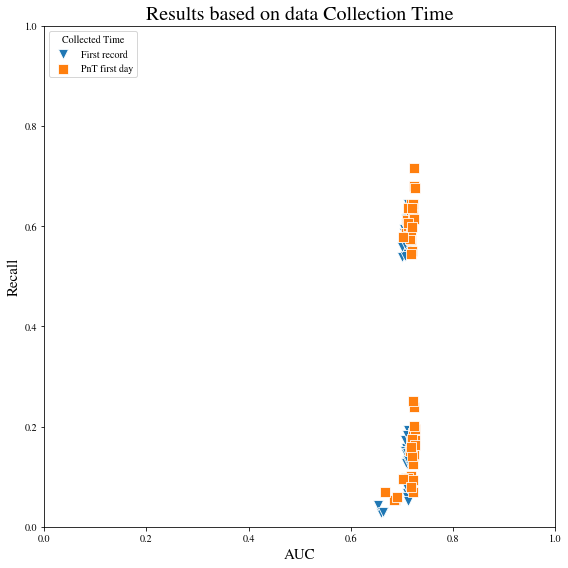

In [17]:
#############################################################################
# COLLECTION TIME FULL
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) ].copy()
df_bal   = df[df['CollectionTime'] == '1st']
df_unbal = df[df['CollectionTime'] == 'Pnt']
#df_3d    = df[df['CollectionTime'] == '3d']


a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_bal,   x="AUC", y="Recall", marker = "v", s=100)
sns.scatterplot(data = df_unbal, x="AUC", y="Recall", marker = "s", s=100)
#sns.scatterplot(data = df_3d,    x="AUC", y="Recall", s=100)
plt.legend(title='Collected Time', loc='upper left', labels=['First record', 'PnT first day', 'Time series'])
plt.title('Results based on data Collection Time', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_DataCollection_full.png', transparent = True, bbox_inches = "tight")
plt.show()

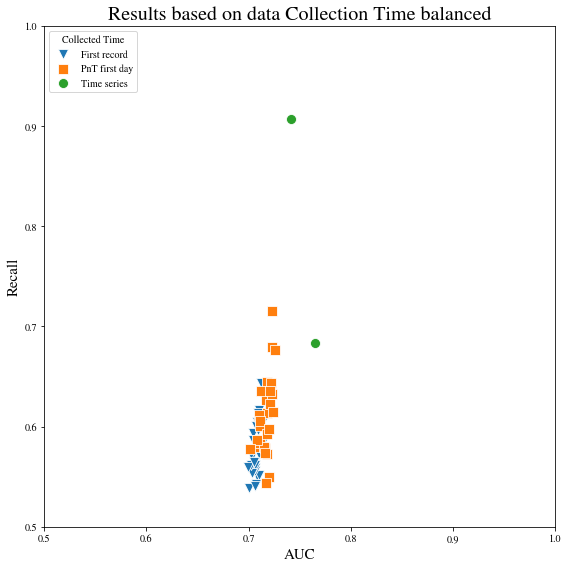

In [18]:
#############################################################################
# COLLECTION TIME
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) &
                     (df_results['Skewness'] == 'Bal')].copy()
df_bal   = df[df['CollectionTime'] == '1st']
df_unbal = df[df['CollectionTime'] == 'Pnt']
df_3d    = df[df['CollectionTime'] == '3d']


a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_bal,   x="AUC", y="Recall", marker = "v", s=100)
sns.scatterplot(data = df_unbal, x="AUC", y="Recall", marker = "s", s=100)
sns.scatterplot(data = df_3d,    x="AUC", y="Recall", s=100)
plt.legend(title='Collected Time', loc='upper left', labels=['First record', 'PnT first day', 'Time series'])
plt.title('Results based on data Collection Time balanced', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0.5,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('StaticBalanced_DataCollection.png', transparent = True, bbox_inches = "tight")
plt.show()

# 4. Feature Engineering 

In [19]:
df['FeatureEngineering'].unique()

array(['XGB', 'RFT', 'STA', 'NoF', nan], dtype=object)

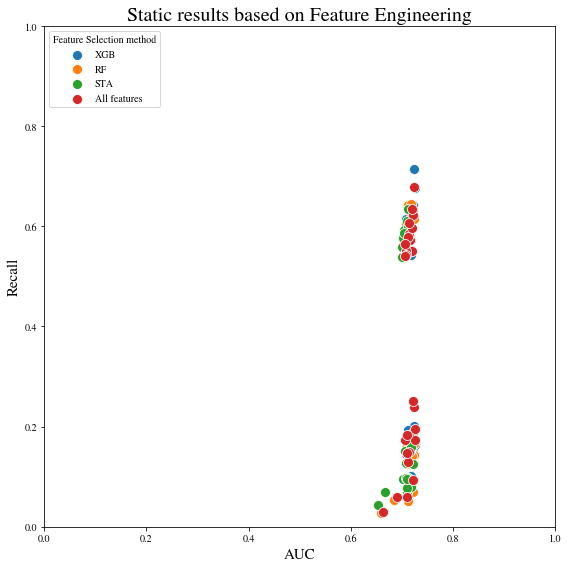

In [20]:
#############################################################################
# FEATURE ENGINEERING
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & # ].copy()
        (df_results['DataType'] != 'TS')].copy()
                      #& (df_results['Skewness']=='Bal')].copy()
df_xgb = df[df['FeatureEngineering'] == 'XGB']
df_rfc = df[df['FeatureEngineering'] == 'RFT']
df_sta = df[df['FeatureEngineering'] == 'STA']
df_nof = df[(df['FeatureEngineering'] == 'NoF') | (df['FeatureEngineering'].isna())]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s= 100, label = 'XGB')
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s= 100, label = 'RF')
sns.scatterplot(data = df_sta, x="AUC", y="Recall", s= 100, label = 'STA')
sns.scatterplot(data = df_nof, x="AUC", y="Recall", s= 100, label = 'All features')

plt.legend(title='Feature Selection method', loc='upper left')
plt.title('Static results based on Feature Engineering', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_FeatureEngineering_full.png', transparent = True, bbox_inches = "tight")
plt.show()

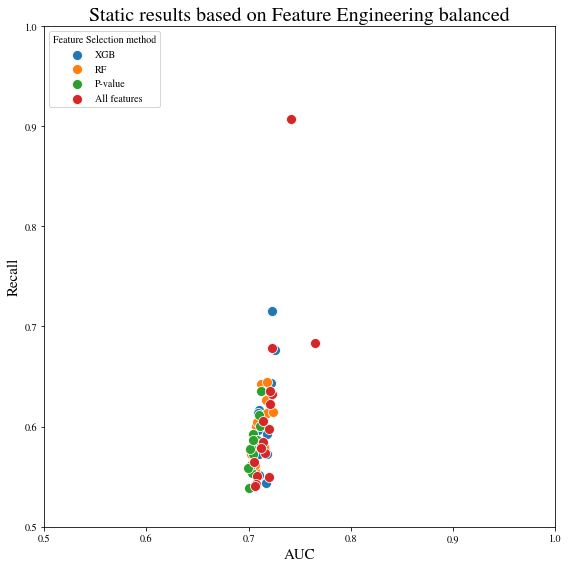

In [21]:
#############################################################################
# FEATURE ENGINEERING
#############################################################################
df       = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) 
                      & (df_results['Skewness']=='Bal')].copy()
df_xgb = df[df['FeatureEngineering'] == 'XGB']
df_rfc = df[df['FeatureEngineering'] == 'RFT']
df_sta = df[df['FeatureEngineering'] == 'STA']
df_nof = df[(df['FeatureEngineering'] == 'NoF') | (df['FeatureEngineering'].isna())]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s= 100, label = 'XGB')
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s= 100, label = 'RF')
sns.scatterplot(data = df_sta, x="AUC", y="Recall", s= 100, label = 'P-value')
sns.scatterplot(data = df_nof, x="AUC", y="Recall", s= 100, label = 'All features')

plt.legend(title='Feature Selection method', loc='upper left')
plt.title('Static results based on Feature Engineering balanced', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0.5,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_FeatureEngineering.png', transparent = True, bbox_inches = "tight")
plt.show()

# 5. Classifier

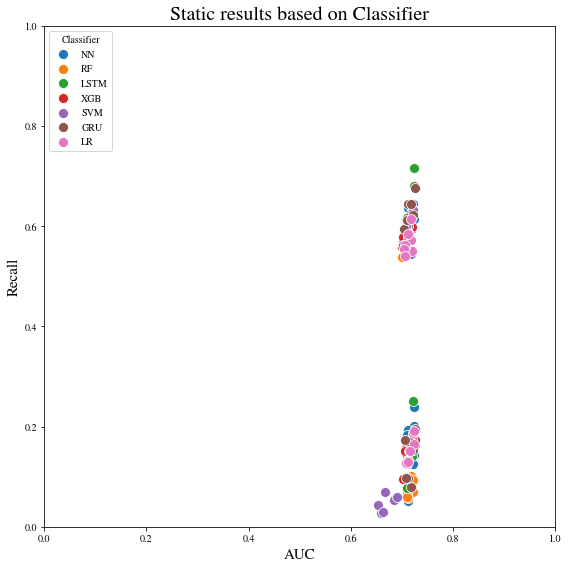

In [22]:
#############################################################################
# CLASSIFIER FULL
#############################################################################
df     = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & #].copy()
                    (df_results['DataType'] != 'TS')].copy()

df_nnc = df[df['Classifier'] == 'NN']
df_rfc = df[df['Classifier'] == 'RF']
df_lst = df[df['Classifier'] == 'LSTM']
df_xgb = df[df['Classifier'] == 'XGB']
df_svm = df[df['Classifier'] == 'SVM']
df_gru = df[df['Classifier'] == 'GRU']
df_lr  = df[df['Classifier'] == 'LR']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_nnc, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_lst, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_svm, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_gru, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_lr, x="AUC", y="Recall", s=100)
plt.legend(title='Classifier', loc='upper left', labels=['NN', 'RF', 'LSTM', 'XGB', 'SVM', 'GRU', 'LR'])
plt.title('Static results based on Classifier', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_classifier_full.png', transparent = True, bbox_inches = "tight")

plt.show()

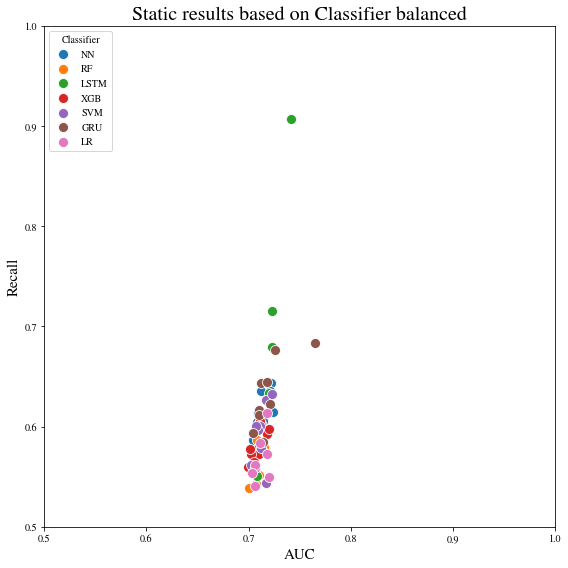

In [23]:
#############################################################################
# CLASSIFIER
#############################################################################
df     = df_results[(df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & 
                     (df_results['Skewness']=='Bal')].copy()
df_nnc = df[df['Classifier'] == 'NN']
df_rfc = df[df['Classifier'] == 'RF']
df_lst = df[df['Classifier'] == 'LSTM']
df_xgb = df[df['Classifier'] == 'XGB']
df_svm = df[df['Classifier'] == 'SVM']
df_gru = df[df['Classifier'] == 'GRU']
df_lr  = df[df['Classifier'] == 'LR']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_nnc, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_lst, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_svm, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_gru, x="AUC", y="Recall", s=100)
sns.scatterplot(data = df_lr , x="AUC", y="Recall", s=100)
plt.legend(title='Classifier', loc='upper left', labels=['NN', 'RF', 'LSTM', 'XGB', 'SVM', 'GRU', 'LR'])
plt.title('Static results based on Classifier balanced', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0.5,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Static_classifier.png', transparent = True, bbox_inches = "tight")

plt.show()

# Age Stratification
## a. General

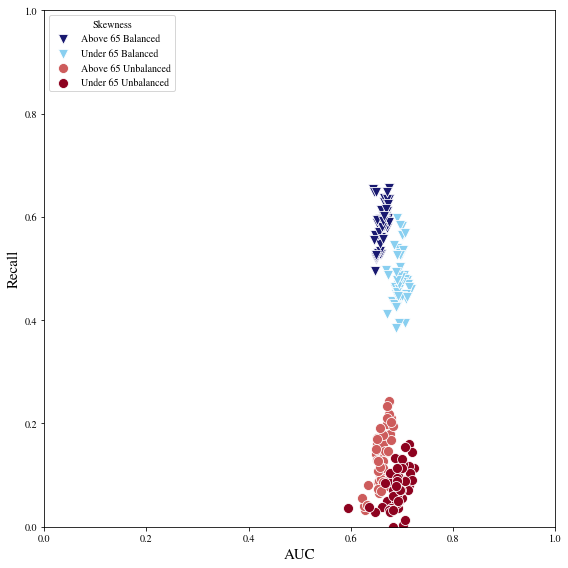

In [24]:
#############################################################################
# AGE STRATIFICATION GENERAL BALANCED
#############################################################################
colors = ['#191970', '#89CFF0', '#CD5C5C', '#8D021F']#,'#64731E','#A44CD3']
df     = df_results[(df_results['CurbStrat'].isna()) & (~df_results['AgeStrat'].isna())].copy()

df_a65_bal = df[(df['AgeStrat']== '>65') & (df['Skewness']=='Bal')]
df_u65_bal = df[(df['AgeStrat']== '<65') & (df['Skewness']=='Bal')]
df_a65_unb = df[(df['AgeStrat']== '>65') & (df['Skewness']=='Unbal')]
df_u65_unb = df[(df['AgeStrat']== '<65') & (df['Skewness']=='Unbal')]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_a65_bal, x="AUC", y="Recall", s = 100, label = 'Above 65 Balanced', marker = 'v', color = colors[0])
sns.scatterplot(data = df_u65_bal, x="AUC", y="Recall", s = 100, label = 'Under 65 Balanced', marker = 'v', color = colors[1])
sns.scatterplot(data = df_a65_unb, x="AUC", y="Recall", s = 100, label = 'Above 65 Unbalanced', color = colors[2])
sns.scatterplot(data = df_u65_unb, x="AUC", y="Recall", s = 100, label = 'Under 65 Unbalanced', color = colors[3])

plt.legend(title='Skewness', loc='upper left')
#plt.title('Age stratification models results', fontsize = 20)
plt.xlim((0,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Agestrat_grl.png', transparent = True, bbox_inches = "tight")
plt.show()

## b. Collection Time 

In [25]:
df_results['CollectionTime'].unique()

array(['1st', 'Pnt', '3d'], dtype=object)

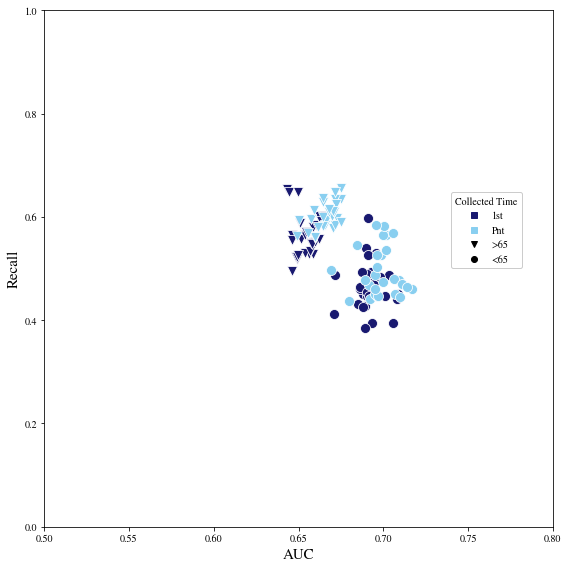

In [26]:
#############################################################################
# DATA COLLECTION
#############################################################################
colors = ['#191970', '#89CFF0']
df       = df_results[(df_results['CurbStrat'].isna()) & (~df_results['AgeStrat'].isna()) & 
                     (df_results['Skewness']=='Bal')].copy()

df_1st_lo = df[(df['CollectionTime'] == '1st') & (df['AgeStrat']== '<65')]
df_pnt_lo = df[(df['CollectionTime'] == 'Pnt') & (df['AgeStrat']== '<65')]
df_1st_up = df[(df['CollectionTime'] == '1st') & (df['AgeStrat']== '>65')]
df_pnt_up = df[(df['CollectionTime'] == 'Pnt') & (df['AgeStrat']== '>65')]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_1st_lo, x="AUC", y="Recall", s=100, color = colors[0])
sns.scatterplot(data = df_pnt_lo, x="AUC", y="Recall", s=100, color = colors[1])
sns.scatterplot(data = df_1st_up, x="AUC", y="Recall", s=100, marker = 'v', color = colors[0])
sns.scatterplot(data = df_pnt_up, x="AUC", y="Recall", s=100, marker = 'v', color = colors[1])
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
markers = ['v', 'o']
handles = [f("s", colors[i]) for i in range(len(colors))]
handles += [f(markers[i], "k") for i in range(len(markers))]

labels = df['CollectionTime'].unique().tolist() + df['AgeStrat'].unique().tolist()
plt.legend( handles, labels, loc=(0.8,0.5), framealpha=1, title='Collected Time')
#plt.legend(title='Data Collection', loc='upper left', labels=['1st_<65', 'Pnt_<65','1st_>65', 'Pnt_>65'])
#plt.title('Static results based on Collection time', fontsize = 20)
plt.xlim((0.5,0.8))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Agestrat_DataCollection.png', transparent = True, bbox_inches = "tight")

plt.show()

## c. Classifier

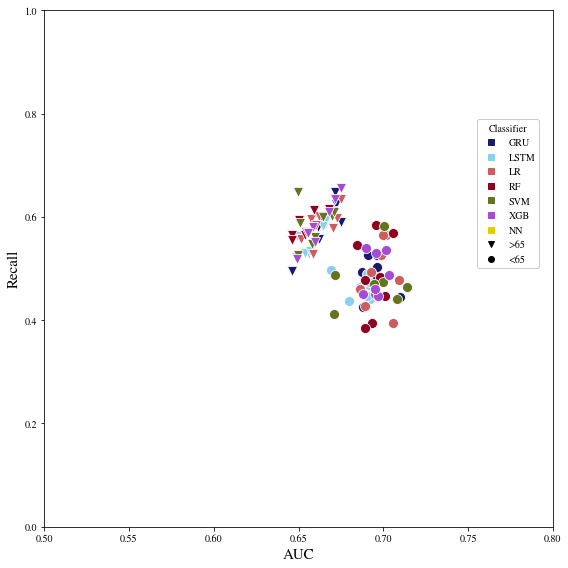

In [27]:
#############################################################################
# CLASSIFIER 
#############################################################################

colors = ['#191970', '#89CFF0', '#CD5C5C', '#8D021F','#64731E','#A44CD3', '#E4CD05']
df     = df_results[(df_results['CurbStrat'].isna()) & (~df_results['AgeStrat'].isna()) & 
                     (df_results['Skewness']=='Bal')].copy()
df_nnc = df[(df['Classifier'] == 'NN') & (df['AgeStrat']== '<65')]
df_rfc = df[(df['Classifier'] == 'RF') & (df['AgeStrat']== '<65')]
df_lst = df[(df['Classifier'] == 'LSTM') & (df['AgeStrat']== '<65')]
df_xgb = df[(df['Classifier'] == 'XGB') & (df['AgeStrat']== '<65')]
df_svm = df[(df['Classifier'] == 'SVM') & (df['AgeStrat']== '<65')]
df_gru = df[(df['Classifier'] == 'GRU') & (df['AgeStrat']== '<65')]

df_nnc_ = df[(df['Classifier'] == 'NN') & (df['AgeStrat']== '>65')]
df_rfc_ = df[(df['Classifier'] == 'RF') & (df['AgeStrat']== '>65')]
df_lst_ = df[(df['Classifier'] == 'LSTM') & (df['AgeStrat']== '>65')]
df_xgb_ = df[(df['Classifier'] == 'XGB') & (df['AgeStrat']== '>65')]
df_svm_ = df[(df['Classifier'] == 'SVM') & (df['AgeStrat']== '>65')]
df_gru_ = df[(df['Classifier'] == 'GRU') & (df['AgeStrat']== '>65')]

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = df_nnc, x="AUC", y="Recall", s=100, color = colors[0])
sns.scatterplot(data = df_rfc, x="AUC", y="Recall", s=100, color = colors[1])
sns.scatterplot(data = df_lst, x="AUC", y="Recall", s=100, color = colors[2])
sns.scatterplot(data = df_xgb, x="AUC", y="Recall", s=100, color = colors[3])
sns.scatterplot(data = df_svm, x="AUC", y="Recall", s=100, color = colors[4])
sns.scatterplot(data = df_gru, x="AUC", y="Recall", s=100, color = colors[5])

sns.scatterplot(data = df_nnc_, x="AUC", y="Recall", s=100, color = colors[0], marker = 'v')
sns.scatterplot(data = df_rfc_, x="AUC", y="Recall", s=100, color = colors[1], marker = 'v')
sns.scatterplot(data = df_lst_, x="AUC", y="Recall", s=100, color = colors[2], marker = 'v')
sns.scatterplot(data = df_xgb_, x="AUC", y="Recall", s=100, color = colors[3], marker = 'v')
sns.scatterplot(data = df_svm_, x="AUC", y="Recall", s=100, color = colors[4], marker = 'v')
sns.scatterplot(data = df_gru_, x="AUC", y="Recall", s=100, color = colors[5], marker = 'v')

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
markers = ['v', 'o']
handles = [f("s", colors[i]) for i in range(len(colors))]
handles += [f(markers[i], "k") for i in range(len(markers))]

labels = df['Classifier'].unique().tolist() + df['AgeStrat'].unique().tolist()
plt.legend( handles, labels, loc=(0.85,0.5), framealpha=1, title='Classifier')

#plt.legend(title='Classifier', loc='upper left', labels=['NN', 'RF', 'LSTM', 'XGB', 'SVM', 'GRU'])
#plt.title('Age Stratification under 65 based on Classifier', fontsize = 20)
plt.xlim((0.5,0.8))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Agestrat_classifier.png', transparent = True, bbox_inches = "tight")
plt.show()

# CURB65 Stratification
## a. General 

In [28]:
df['Skewness'].unique()
df_results[(~df_results['CurbStrat'].isna()) ]#& (df_results['AgeStrat'].isna()) ]
curb_lab_dict = {'0 - 1':'Low', '   2  ': 'Medium', '3 - 5':'High'}

In [29]:
list(curb_lab_dict.keys())

['0 - 1', '   2  ', '3 - 5']

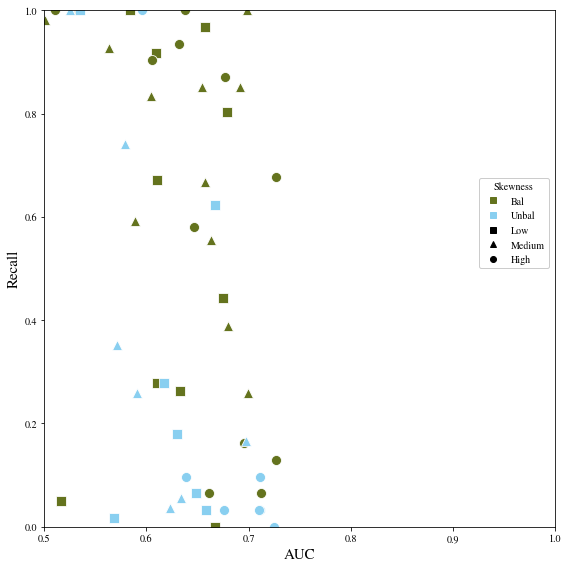

In [30]:
#############################################################################
# CURB STRATIFICATION - by classifier
#############################################################################
df      = df_results[(~df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) ].copy()
                    # (df_results['Skewness']=='Unbal') & (df_results['CollectionTime']== '1st')].copy()
markers = ["s", "^", "o"]
colors  = ['#64731E', '#89CFF0']#, '#CD5C5C', '#8D021F','#64731E']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
for i, skw in enumerate(df['Skewness'].unique()):
    for j, curb in enumerate(curb_lab_dict.keys()):
        df_plot = df[(df['CurbStrat']== curb) & (df['Skewness']==skw)]
        sns.scatterplot(data = df_plot, x="AUC", y="Recall", marker=markers[j], color=colors[i], s=100)

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(len(colors))]
handles += [f(markers[i], "k") for i in range(len(markers))]

labels = df['Skewness'].unique().tolist() + list(curb_lab_dict.values())
plt.legend(handles, labels, loc=(0.85,0.5), framealpha=1, title = 'Skewness')
#plt.title('CURB65 stratification results based on Classifier', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Curbstrat_General.png', transparent = True, bbox_inches = "tight")
plt.show()



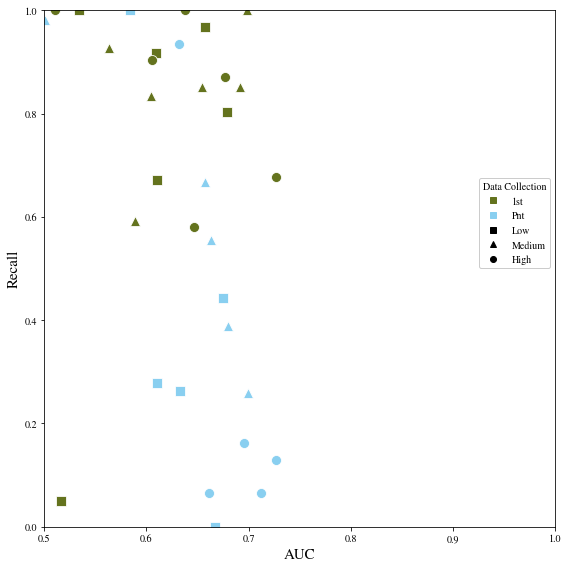

In [31]:
#############################################################################
# CURB STRATIFICATION 
#############################################################################
df      = df_results[(~df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) &
                    (df_results['Skewness']=='Bal')].copy()
markers = ["s", "^", "o"]
colors  = ['#64731E', '#89CFF0']#, '#CD5C5C', '#8D021F','#64731E']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)

for i, skw in enumerate(df['CollectionTime'].unique()):
    for j, curb in enumerate(curb_lab_dict.keys()):
        df_plot = df[(df['CurbStrat']== curb) & (df['CollectionTime']== skw)]
        lab = "CURB65 = " + curb + " CollctTime = " + skw
        sns.scatterplot(data = df_plot, x="AUC", y="Recall", label = lab, s=100,
                        marker = markers[j], color = colors[i])#, color=colors[j])

labels = df['CollectionTime'].unique().tolist() + list(curb_lab_dict.values())
plt.legend(handles, labels, loc=(0.85,0.5), framealpha=1, title = 'Data Collection')
#plt.title('CURB65 stratification results', fontsize = 20)
plt.xlim((0.5,1))
plt.ylim((0,1))
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.tight_layout()
plt.savefig('Curbstrat_CollectionTime.png', transparent = True, bbox_inches = "tight")
plt.show()

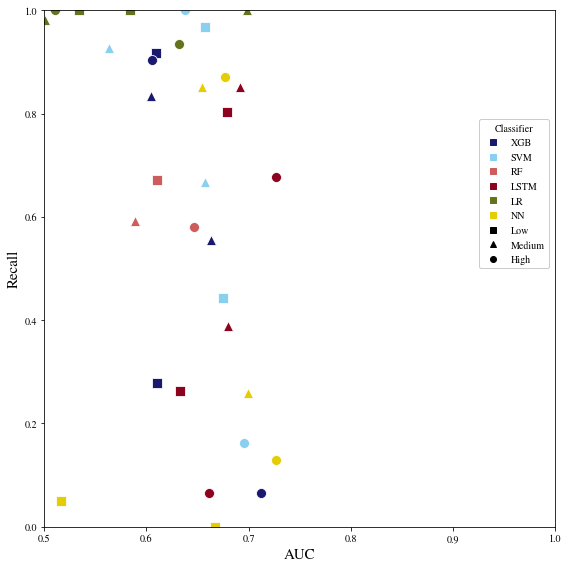

In [32]:
#############################################################################
# CURB STRATIFICATION
#############################################################################
df      = df_results[(~df_results['CurbStrat'].isna()) & (df_results['AgeStrat'].isna()) & 
                     (df_results['Skewness']=='Bal') ].copy()
markers = ["s", "^", "o"]
#colors  = ["crimson", "skyblue", "gold", "chocolate", "lime"]
colors  = ['#191970', '#89CFF0', '#CD5C5C', '#8D021F','#64731E', '#E4CD05']

a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
for i, clf in enumerate(df['Classifier'].unique()):
    for j, curb in enumerate(curb_lab_dict.keys()):
        df_plot = df[(df['CurbStrat']== curb) & (df['Classifier']==clf)]
        sns.scatterplot(data = df_plot, x="AUC", y="Recall", marker=markers[j], color=colors[i], s=100)

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(6)]
handles += [f(markers[i], "k") for i in range(3)]

labels = df['Classifier'].unique().tolist() + list(curb_lab_dict.values())
plt.legend(handles, labels, loc=(0.85,0.5), framealpha=1, title='Classifier')
#plt.title('CURB65 stratification results based on Classifier', fontsize = 20)
plt.ylabel('Recall',fontsize = 15)
plt.xlabel('AUC',fontsize = 15)
plt.xlim((0.5,1))
plt.ylim((0,1))
plt.tight_layout()
plt.savefig('Curbstrat_classifier.png', transparent = True, bbox_inches = "tight")

plt.show()

In [38]:
df = df_results
df[~(df['CurbStrat'].isna())].sort_values(by=['CurbStrat', 'F1_score'], ascending = False)

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,Static,1st,Bal,NaN,LSTM,3 - 5,NaN,0.726825,0.677419,0.13125,0.63747,0.234786,0.219895
0,Static,1st,Bal,NaN,RF,3 - 5,NaN,0.646732,0.580645,0.108434,0.608273,0.240687,0.182741
0,Static,1st,Bal,NaN,NN,3 - 5,NaN,0.67657,0.870968,0.097826,0.384428,0.325775,0.175896
0,Static,Pnt,Bal,NaN,SVM,3 - 5,NaN,0.695161,0.16129,0.166667,0.875912,0.069145,0.163934
0,Static,Pnt,Bal,NaN,LR,3 - 5,NaN,0.632301,0.935484,0.089506,0.277372,0.719187,0.16338
0,Static,Pnt,Bal,NaN,NN,3 - 5,NaN,0.72657,0.129032,0.222222,0.900243,0.078473,0.163265
0,Static,1st,Bal,NaN,XGB,3 - 5,NaN,0.605645,0.903226,0.088328,0.289538,0.619277,0.16092
0,Static,1st,Unbal,NaN,LR,3 - 5,NaN,0.596053,1.0,0.086835,0.206813,0.792853,0.159794
0,Static,1st,Bal,NaN,SVM,3 - 5,NaN,0.6382,1.0,0.084932,0.187348,0.27021,0.156566
0,Static,1st,Bal,NaN,LR,3 - 5,NaN,0.510526,1.0,0.07561,0.077859,0.922309,0.14059


In [35]:
df = df_results
df[(~df['AgeStrat'].isna()) & (df['AgeStrat'] ==  '<65')].sort_values(by=['AgeStrat', 'F1_score'], ascending = False)

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
0,Static,Pnt,Bal,NoF,LSTM,NaN,<65,0.699914,0.565359,0.249639,0.742203,0.182964,0.346346
0,Static,Pnt,Bal,NoF,SVM,NaN,<65,0.699816,0.473856,0.269017,0.780892,0.159522,0.343195
0,Static,Pnt,Bal,RFT,LSTM,NaN,<65,0.698702,0.526144,0.249226,0.751283,0.167208,0.338235
0,Static,Pnt,Bal,NoF,GRU,NaN,<65,0.695023,0.460784,0.265038,0.780497,0.161795,0.336516
0,Static,Pnt,Bal,XGB,LSTM,NaN,<65,0.701307,0.565359,0.237964,0.72878,0.213387,0.334947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Static,1st,Unbal,RFT,SVM,NaN,<65,0.647822,0.029412,0.45,0.878405,0.102241,0.055215
0,Static,Pnt,Unbal,RFT,SVM,NaN,<65,0.676862,0.029412,0.428571,0.87801,0.101401,0.055046
0,Static,Pnt,Unbal,NoF,LSTM,NaN,<65,0.705612,0.013072,0.5,0.879195,0.102727,0.025478
0,Static,Pnt,Unbal,RFT,GRU,NaN,<65,0.702764,0.003268,0.333333,0.8788,0.100297,0.006472


In [36]:
df_results.to_csv('mortality_models_results.csv')

# Summary

In [37]:
df_results.sort_values(by=['AUC'], ascending = False).head(50)

,DataType,CollectionTime,Skewness,FeatureEngineering,Classifier,CurbStrat,AgeStrat,AUC,Recall,Precision,Accuracy,Brier,F1_score
1,TS,3d,Bal,NaN,GRU,NaN,NaN,0.764705,0.683128,0.429218,0.698175,0.182621,0.527193
0,TS,3d,Unbal,NaN,GRU,NaN,NaN,0.754584,0.118313,0.734824,0.772301,0.168608,0.20381
2,TS,3d,Unbal,NaN,LSTM,NaN,NaN,0.754325,0.152778,0.66443,0.772301,0.164022,0.248432
3,TS,3d,Bal,NaN,LSTM,NaN,NaN,0.741048,0.906893,0.309733,0.479219,0.283645,0.46176
0,Static,1st,Bal,NaN,LSTM,3 - 5,NaN,0.726825,0.677419,0.13125,0.63747,0.234786,0.219895
0,Static,Pnt,Bal,NaN,NN,3 - 5,NaN,0.72657,0.129032,0.222222,0.900243,0.078473,0.163265
0,Static,Pnt,Unbal,NoF,GRU,NaN,NaN,0.726348,0.195988,0.560294,0.764065,0.167755,0.290396
0,Static,Pnt,Bal,XGB,GRU,NaN,NaN,0.725932,0.67644,0.389053,0.658642,0.204956,0.493989
0,Static,Pnt,Unbal,NoF,XGB,NaN,NaN,0.724833,0.172325,0.546493,0.760897,0.168297,0.262026
0,Static,1st,Unbal,NaN,RF,3 - 5,NaN,0.72483,0.0,0.0,0.922141,0.07172,0.0
